# Plots of real and fake mental tasks

In [9]:
import numpy as np
import torch
from torch.autograd import Variable
import random
import matplotlib.pyplot as plt
import bandpass as bp
from scipy.signal import welch, hann


In [10]:
electrodes = ['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']

In [38]:
def fft(x, fs=256, nblock = 1024, overlap = 128):
    if nblock > x.shape[-1]:
        nblock = x.shape[-1]
    win = hann(nblock, True)
    f1, Pxxf1 = welch(x, fs, window=win, noverlap=overlap, nfft=nblock, return_onesided=True, detrend=False)
    return f1, Pxxf1

def normalize(signal):
    b = signal.mean()
    x = signal - b
    
    s = x.std()
    x /= s
    
    M = x.max()
    x /= M
    return x, b, s, M

def denormalize(x,mean,std,maximum):
    return x*std*maximum+mean

In [4]:
def fft2(real, fake):
    freqs_tmp = np.fft.rfftfreq(real.shape[2],d=1/250)

    real_fft = np.fft.rfft(real,axis=2)
    real_amps = np.abs(real_fft).mean(axis=(0))

    fake_fft = np.fft.rfft(fake,axis=2)
    fake_amps = np.abs(fake_fft).mean(axis=(0))
    return freqs_tmp, real_amps, fake_amps

In [40]:
mt1_fake = np.load('/s/chopin/d/proj/jcuomo/mentaltask/mt1_fake.npy')
mt2_fake = np.load('/s/chopin/d/proj/jcuomo/mentaltask/mt2_fake.npy')
mt3_fake = np.load('/s/chopin/d/proj/jcuomo/mentaltask/mt3_fake.npy')
mt4_fake = np.load('/s/chopin/d/proj/jcuomo/mentaltask/mt4_fake.npy')

real = np.load('/s/chopin/d/proj/jcuomo/mentaltask/mental_tasks_7.npy')
mt1_real, b1, s1, M1 = normalize(real[:,0])
mt2_real, b2, s2, M2 = normalize(real[:,1])
mt3_real, b3, s3, M3 = normalize(real[:,2])
mt4_real, b4, s4, M4 = normalize(real[:,3])

mt1_fake.shape, mt1_real.shape

((600, 1536, 8), (48, 1536, 8))

In [41]:
mt1_fake_D = denormalize(mt1_fake, b1, s1, M1)
mt2_fake_D = denormalize(mt2_fake, b2, s2, M2)
mt3_fake_D = denormalize(mt3_fake, b3, s3, M3)
mt4_fake_D = denormalize(mt4_fake, b4, s4, M4)

mt1_real_D = denormalize(mt1_real, b1, s1, M1)
mt2_real_D = denormalize(mt2_real, b2, s2, M2)
mt3_real_D = denormalize(mt3_real, b3, s3, M3)
mt4_real_D = denormalize(mt4_real, b4, s4, M4)

In [42]:
mt1_fake_grandmean = np.mean(mt1_fake, axis=(0,2))
mt2_fake_grandmean = np.mean(mt2_fake, axis=(0,2))
mt3_fake_grandmean = np.mean(mt3_fake, axis=(0,2))
mt4_fake_grandmean = np.mean(mt4_fake, axis=(0,2))

mt1_real_grandmean = np.mean(mt1_real, axis=(0,2))
mt2_real_grandmean = np.mean(mt2_real, axis=(0,2))
mt3_real_grandmean = np.mean(mt3_real, axis=(0,2))
mt4_real_grandmean = np.mean(mt4_real, axis=(0,2))

mt1_fake_grandmean.shape, mt1_real_grandmean.shape

((1536,), (1536,))

In [17]:
mt1_fake_mean = np.mean(mt1_fake, axis=(0))
mt2_fake_mean = np.mean(mt2_fake, axis=(0))
mt3_fake_mean = np.mean(mt3_fake, axis=(0))
mt4_fake_mean = np.mean(mt4_fake, axis=(0))

mt1_real_mean = np.mean(mt1_real, axis=(0))
mt2_real_mean = np.mean(mt2_real, axis=(0))
mt3_real_mean = np.mean(mt3_real, axis=(0))
mt4_real_mean = np.mean(mt4_real, axis=(0))

mt1_fake_mean.shape, mt1_real_mean.shape

((1536, 8), (1536, 8))

In [27]:
freq, mt1_fake_grandmean_fft = fft(mt1_fake_grandmean)
freq, mt2_fake_grandmean_fft = fft(mt2_fake_grandmean)
freq, mt3_fake_grandmean_fft = fft(mt3_fake_grandmean)
freq, mt4_fake_grandmean_fft = fft(mt4_fake_grandmean)

freq, mt1_real_grandmean_fft = fft(mt1_real_grandmean)
freq, mt2_real_grandmean_fft = fft(mt2_real_grandmean)
freq, mt3_real_grandmean_fft = fft(mt3_real_grandmean)
freq, mt4_real_grandmean_fft = fft(mt4_real_grandmean)

mt1_fake_grandmean_fft.shape, mt1_real_grandmean_fft.shape

((513,), (513,))

In [30]:
freq, mt1_fake_mean_fft = fft(mt1_fake_mean.T)
freq, mt2_fake_mean_fft = fft(mt2_fake_mean.T)
freq, mt3_fake_mean_fft = fft(mt3_fake_mean.T)
freq, mt4_fake_mean_fft = fft(mt4_fake_mean.T)

freq, mt1_real_mean_fft = fft(mt1_real_mean.T)
freq, mt2_real_mean_fft = fft(mt2_real_mean.T)
freq, mt3_real_mean_fft = fft(mt3_real_mean.T)
freq, mt4_real_mean_fft = fft(mt4_real_mean.T)

mt1_fake_mean_fft.shape, mt1_real_mean_fft.shape

((8, 513), (8, 513))

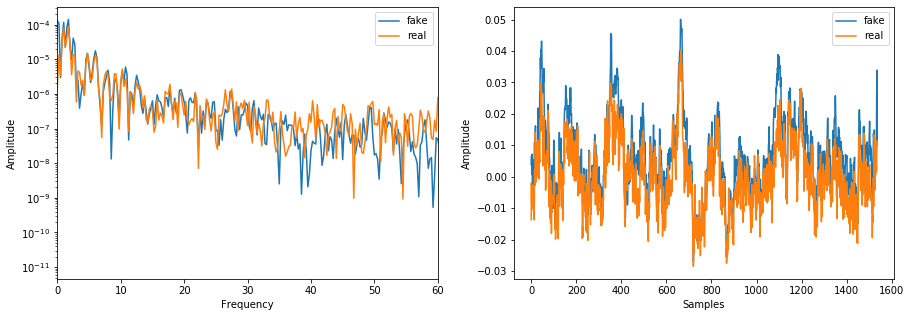

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.semilogy(freq, mt1_fake_grandmean_fft, label='fake')
plt.semilogy(freq, mt1_real_grandmean_fft, label='real')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.legend()
plt.xlim(0,60)
plt.subplot(1,2,2)
plt.plot(mt1_fake_grandmean, label='fake')
plt.plot(mt1_real_grandmean, label='real')
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.legend()


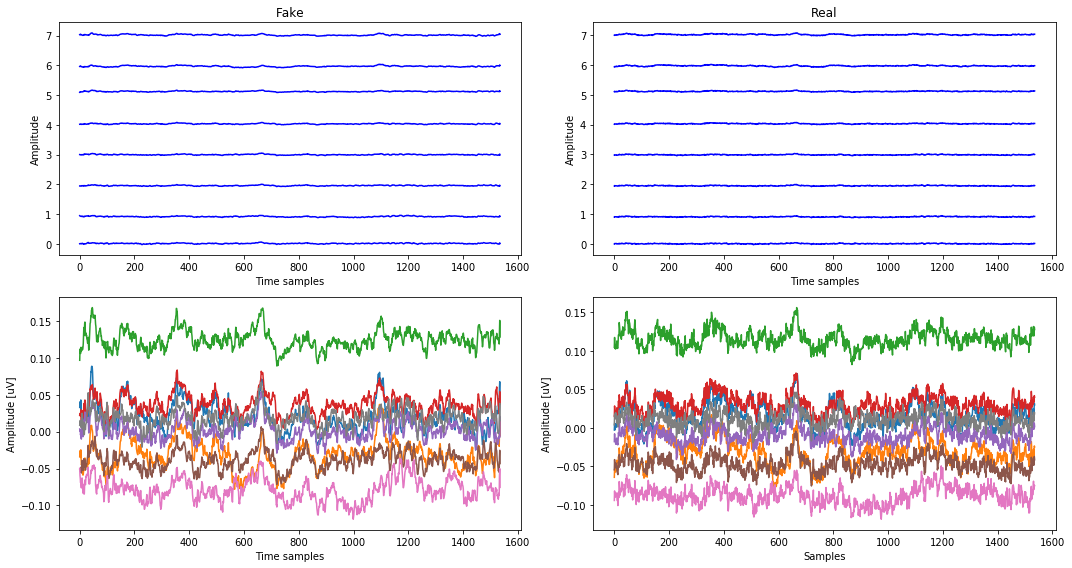

In [33]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.title('Fake')
scale = 1
plt.plot(mt1_fake_mean + scale*np.arange(7,-1,-1), 'b');
plt.ylabel('Amplitude')
plt.xlabel('Time samples')

plt.subplot(2,2,2)
plt.title('Real')
plt.plot(mt1_real_mean + scale*np.arange(7,-1,-1), 'b');
plt.ylabel('Amplitude')
plt.xlabel('Time samples')

plt.subplot(2,2,3)
plt.plot(mt1_fake_mean);
plt.ylabel('Amplitude [uV]')
plt.xlabel('Time samples')

plt.subplot(2,2,4)
plt.plot(mt1_real_mean);
plt.ylabel('Amplitude [uV]')
plt.xlabel('Samples')

plt.tight_layout()

In [48]:
freq, mt1_real_D_fft = fft(np.swapaxes(mt1_real_D,1,2))
freq, mt2_real_D_fft = fft(np.swapaxes(mt2_real_D,1,2))
freq, mt3_real_D_fft = fft(np.swapaxes(mt3_real_D,1,2))
freq, mt4_real_D_fft = fft(np.swapaxes(mt4_real_D,1,2))

freq, mt1_fake_D_fft = fft(np.swapaxes(mt1_fake_D,1,2))
freq, mt2_fake_D_fft = fft(np.swapaxes(mt2_fake_D,1,2))
freq, mt3_fake_D_fft = fft(np.swapaxes(mt3_fake_D,1,2))
freq, mt4_fake_D_fft = fft(np.swapaxes(mt4_fake_D,1,2))

mt1_real_D_fft_mean = mt1_real_D_fft.mean(axis=0)
mt2_real_D_fft_mean = mt2_real_D_fft.mean(axis=0)
mt3_real_D_fft_mean = mt3_real_D_fft.mean(axis=0)
mt4_real_D_fft_mean = mt4_real_D_fft.mean(axis=0)

mt1_fake_D_fft_mean = mt1_fake_D_fft.mean(axis=0)
mt2_fake_D_fft_mean = mt2_fake_D_fft.mean(axis=0)
mt3_fake_D_fft_mean = mt3_fake_D_fft.mean(axis=0)
mt4_fake_D_fft_mean = mt4_fake_D_fft.mean(axis=0)

In [54]:
def plotfft_channels(mt_real_D_fft_mean, mt_fake_D_fft_mean, title=''):

    fig = plt.figure(figsize=(15,5))
    fig.suptitle(title)
    for i in range(8):
        plt.subplot(2,4,i+1)

        plt.title(electrodes[i])
        plt.semilogy(freq, mt_real_D_fft_mean[i], 'g', label='real');
        plt.semilogy(freq, mt_fake_D_fft_mean[i], 'b', label='fake');
        plt.xlabel('Freq [Hy]')
        plt.ylabel('Amplitude [dB]')
        plt.xlim(0,70);
        #plt.ylim(10-2,1);
        plt.tight_layout();
        #plt.ylim(np.min(np.log10(real_fft[i,0:60])), np.max(np.log10(real_fft[i,0:60])))

blue: fake, green:real


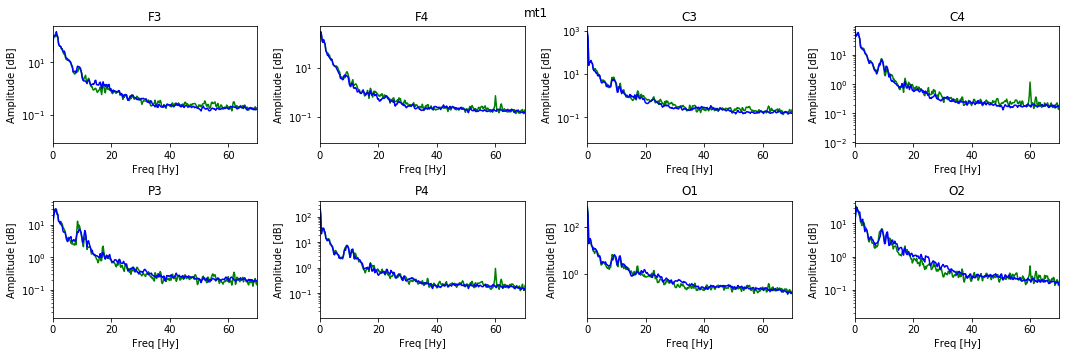

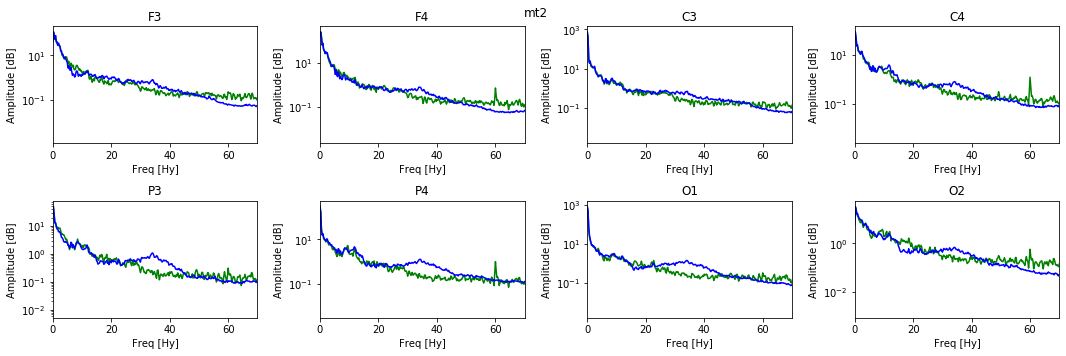

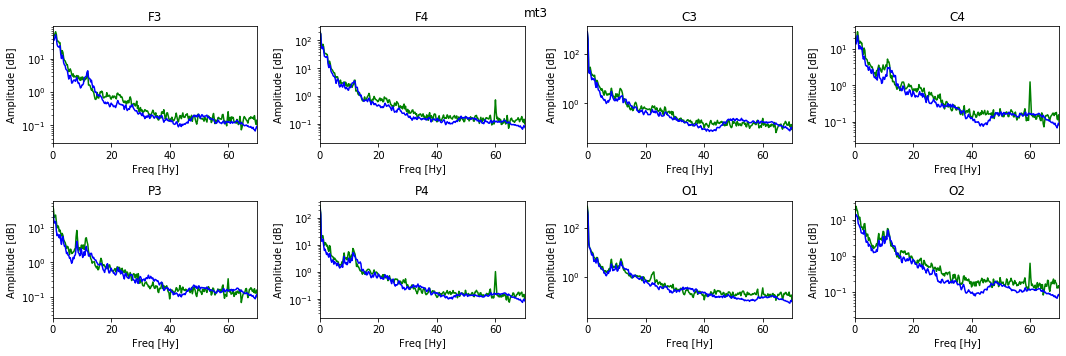

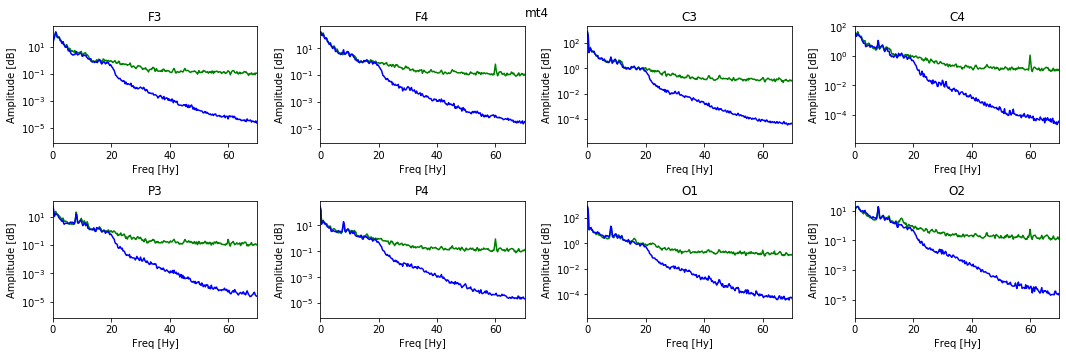

In [57]:
plotfft_channels(mt1_real_D_fft_mean, mt1_fake_D_fft_mean, title='mt1')
plotfft_channels(mt2_real_D_fft_mean, mt2_fake_D_fft_mean, title='mt2')
plotfft_channels(mt3_real_D_fft_mean, mt3_fake_D_fft_mean, title='mt3')
plotfft_channels(mt4_real_D_fft_mean, mt4_fake_D_fft_mean, title='mt4')
print('blue: fake, green:real')

In [49]:
freq, real_fft = fft(np.mean(realD,axis=0))
freq, fake_fft = fft(np.mean(fakeD,axis=0))

/s/chopin/a/grad/jcuomo/.conda/envs/gpu/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!
  after removing the cwd from sys.path.


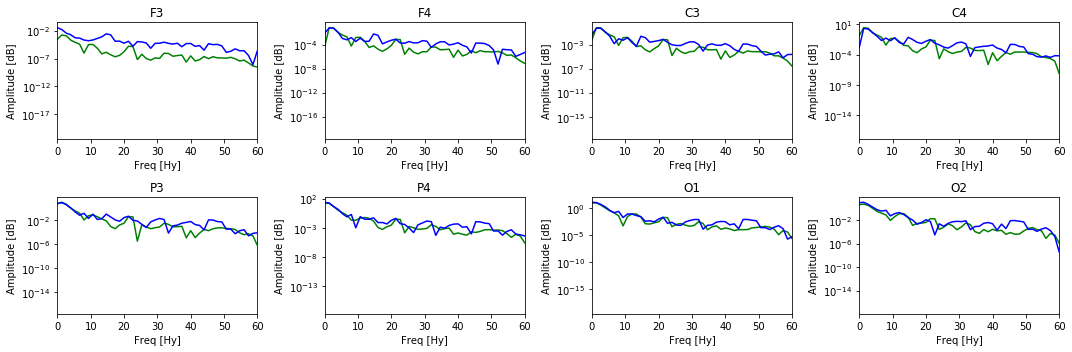

In [50]:
plt.figure(figsize=(15,5))

for i in range(8):
    plt.subplot(2,4,i+1)
    
    plt.title(electrodes[i])
    plt.semilogy(freq, real_fft[i], 'g', label='real');
    plt.semilogy(freq, fake_fft[i], 'b', label='fake');
    plt.xlabel('Freq [Hy]')
    plt.ylabel('Amplitude [dB]')
    plt.xlim(0,60);
    #plt.ylim(10-2,1);
    plt.tight_layout();
    

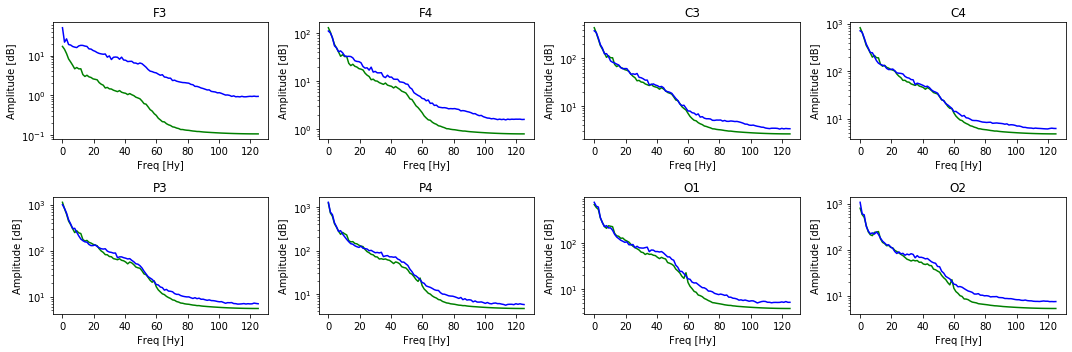

In [52]:
freq, real_fft, fake_fft = fft2(realD, fakeD)

plt.figure(figsize=(15,5))

for i in range(8):
    plt.subplot(2,4,i+1)
    
    plt.title(electrodes[i])
    plt.semilogy(freq, real_fft[i], 'g', label='real');
    plt.semilogy(freq, fake_fft[i], 'b', label='fake');
    plt.xlabel('Freq [Hy]')
    plt.ylabel('Amplitude [dB]')
    #plt.xlim(0,60);
    
    plt.tight_layout();
    

In [197]:
p300_real = np.load('/s/chopin/d/proj/jcuomo/non_p300_train_filt.npy')
print(p300_real.shape)
mean = p300_real.mean()
std = (p300_real-mean).std()
maximum = ((p300_real-mean)/std).max()
p300_real = normalize(p300_real)
#p300_real = denormalize(p300_real, mean, std, maximum)
#p300_real = normalize(p300_real)
#p300_real = np.mean(p300_real,axis=(0))

p300_fake = np.load('/s/chopin/d/proj/jcuomo/non_p300_fake4.npy').squeeze()[:300]
print(p300_fake.shape)
p300_fake = normalize(p300_fake)
#p300_fake = denormalize(p300_fake, mean, std, maximum)
#p300_fake = normalize(p300_fake)
#p300_fake = np.mean(p300_fake,axis=(0))

p300_fake_3 = p300_fake
p300_real_3 = p300_real
p300_fake.shape, p300_real.shape

(900, 8, 192)
(300, 192, 8)


((300, 192, 8), (900, 8, 192))

ValueError: operands could not be broadcast together with shapes (192,8,900) (8,) 

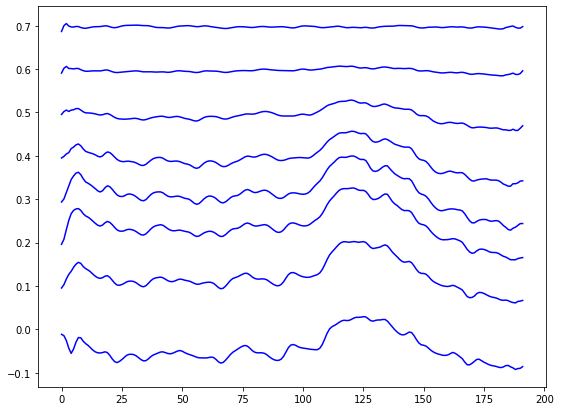

In [195]:
from matplotlib.lines import Line2D
electrodes = ['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']
electrodes = [ele for ele in reversed(electrodes)]

lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in ['b','g']]
labels = ['Fake', 'Real']

plt.figure(figsize=(20,7));
plt.subplot(1,2,1)
scale = 0.1
plt.plot(p300_fake_2+ scale*np.arange(7,-1,-1), 'b');
plt.plot(p300_real.T+ scale*np.arange(7,-1,-1), 'g');
plt.plot(np.zeros((192,8)) + scale*np.arange(7,-1,-1),'--',color='gray');
plt.yticks(np.arange(0, 0.9, step=scale), electrodes);
plt.legend(lines, labels, loc='upper right')


plt.ylabel('Amplitude')
plt.xlabel('Time samples')


(900, 8, 192) (300, 192, 8)
(900, 8, 192) (300, 192, 8)
192 128
192 128


/s/chopin/a/grad/jcuomo/.conda/envs/gpu/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!
  """


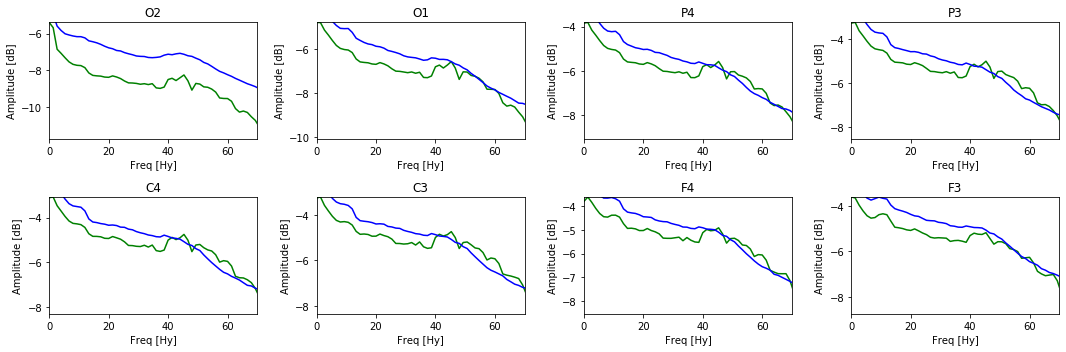

In [198]:
def fft(x, fs=256, nblock = 1024, overlap = 128):
    if nblock > x.shape[-1]:
        nblock = x.shape[-1]
    print(nblock, overlap)
    win = hanning(nblock, True)
    f1, Pxxf1 = welch(x, fs, window=win, noverlap=overlap, nfft=nblock, return_onesided=True, detrend=False)
    return f1, Pxxf1

def normalize(signal):
    x = signal - signal.mean()
    x /= x.std()
    x /= x.max()
    return x

def denormalize(x,std,mean,maximum):
    return x*std*maximum+mean

realN = normalize(p300_real)
mean = p300_real.mean()
std = (p300_real-mean).std()
maximum = ((p300_real-mean)/std).max()
realD = denormalize(realN,std,mean,maximum).squeeze()


fakeN = normalize(p300_fake)
mean = p300_fake.mean()
std = (p300_fake-mean).std()
maximum = ((p300_fake-mean)/std).max()
fakeD = denormalize(fakeN,std,mean,maximum).squeeze()
print(realD.shape, fakeD.shape)

realD = realD
fakeD = fakeD
print(realD.shape, fakeD.shape)
#realD = np.swapaxes(realD,1,2)
fakeD = np.swapaxes(fakeD,1,2)


freq, real_fft = fft(realD)
freq, fake_fft = fft(fakeD)

real_fft = real_fft.mean(axis=0)
fake_fft = fake_fft.mean(axis=0)

plt.figure(figsize=(15,5))

for i in range(8):
    plt.subplot(2,4,i+1)
    
    plt.title(electrodes[i])
    plt.plot(freq, np.log10(real_fft[i]), 'g', label='real');
    plt.plot(freq, np.log10(fake_fft[i]), 'b', label='fake');
    plt.xlabel('Freq [Hy]')
    plt.ylabel('Amplitude [dB]')
    plt.xlim(0,70);
    #plt.ylim(10-2,1);
    plt.tight_layout();
    plt.ylim(np.min(np.log10(real_fft[i,0:60])), np.max(np.log10(real_fft[i,0:60])))

Text(0.5, 0, 'Time samples')

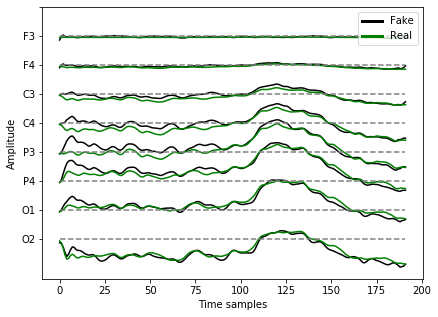

In [157]:
from matplotlib.lines import Line2D
electrodes = ['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']
electrodes = [ele for ele in reversed(electrodes)]

lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in ['k','g']]
labels = ['Fake', 'Real']

plt.figure(figsize=(15,5));
plt.subplot(1,2,1)
scale = 0.1
plt.plot(p300_fake+ scale*np.arange(7,-1,-1), 'k');
plt.plot(p300_real.T+ scale*np.arange(7,-1,-1), 'g');
plt.plot(np.zeros((192,8)) + scale*np.arange(7,-1,-1),'--',color='gray');
plt.yticks(np.arange(0, 0.9, step=scale), electrodes);
plt.legend(lines, labels, loc='upper right')


plt.ylabel('Amplitude')
plt.xlabel('Time samples')


Text(0.5, 0, 'Time samples')

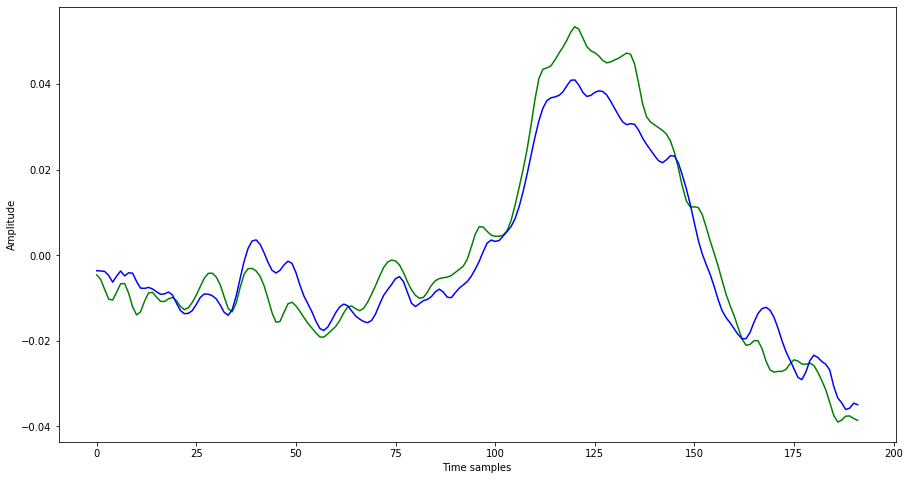

In [140]:
plt.figure(figsize=(15,8))

plt.plot(p300_real.T , 'g', label='real p300');
plt.plot(p300_fake , 'b', label='fake p300');
plt.ylabel('Amplitude')
plt.xlabel('Time samples')
#plt.legend()

In [133]:
p300_real = np.load('/s/chopin/d/proj/jcuomo/p300_train_filt.npy')
mean = p300_real.mean()
std = (p300_real-mean).std()
maximum = ((p300_real-mean)/std).max()
p300_real = normalize(p300_real)
#p300_real = denormalize(p300_real, mean, std, maximum)
#p300_real = normalize(p300_real)
p300_real = np.mean(p300_real,axis=(0,1))

non_p300_real = np.load('/s/chopin/d/proj/jcuomo/non_p300_train_filt.npy')
mean = p300_real.mean()
std = (p300_real-mean).std()
maximum = ((p300_real-mean)/std).max()
non_p300_real = normalize(non_p300_real)
#non_p300_real = denormalize(non_p300_real, mean, std, maximum)
#non_p300_real = normalize(non_p300_real)
non_p300_real = np.mean(non_p300_real,axis=(0,1))


p300_fake = np.load('/s/chopin/d/proj/jcuomo/p300_fake4.npy').squeeze()
p300_fake = normalize(p300_fake)
#p300_fake = denormalize(p300_fake, mean, std, maximum)
##p300_fake = normalize(p300_fake)
p300_fake = np.mean(p300_fake,axis=(0,2))

non_p300_fake = np.load('/s/chopin/d/proj/jcuomo/non_p300_fake4.npy').squeeze()
non_p300_fake = normalize(non_p300_fake)
#non_p300_fake = denormalize(non_p300_fake, mean, std, maximum)
#non_p300_fake = normalize(non_p300_fake)
non_p300_fake = np.mean(non_p300_fake,axis=(0,2))

p300_real.shape,non_p300_real.shape,  p300_fake.shape, non_p300_fake.shape

((192,), (192,), (192,), (192,))

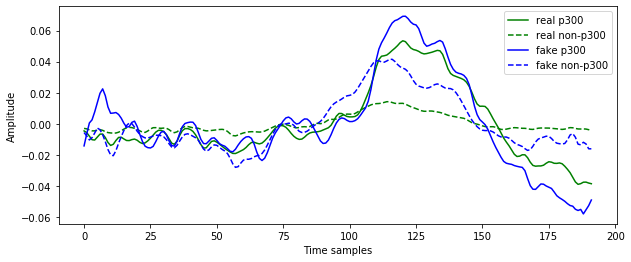

In [137]:
plt.figure(figsize=(10,4))

plt.plot(p300_real.T , 'g', label='real p300');
plt.plot(non_p300_real.T , '--g', label='real non-p300');

plt.plot(p300_fake , 'b', label='fake p300');
plt.plot(non_p300_fake, '--b', label='fake non-p300');
plt.ylabel('Amplitude')
plt.xlabel('Time samples')
plt.legend()


In [108]:
plt.figure(figsize=(15,8))

scale = 20
plt.plot(p300_real.T + scale*np.arange(7,-1,-1), 'orange', label='real p300');
plt.plot(p300_fake + scale*np.arange(7,-1,-1), 'red', label='fake p300');
plt.plot(non_p300_real.T + scale*np.arange(7,-1,-1), 'c', label='real non-p300');
plt.plot(non_p300_fake + scale*np.arange(7,-1,-1), 'b', label='fake non-p300');
plt.ylabel('Amplitude')
plt.xlabel('Time samples')
#plt.legend()


ValueError: operands could not be broadcast together with shapes (192,) (8,) 

<Figure size 1080x576 with 0 Axes>

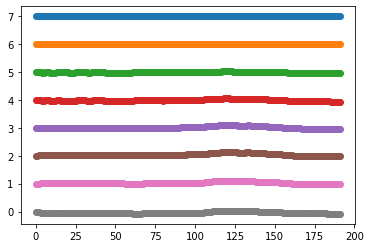

In [81]:
plt.plot(p300_real.T + scale*np.arange(7,-1,-1), 'o', label='real p300');
